## <b>BT thực hành 5.4: POISSON Distribution</b>

> Cập nhật: **12/2024**

In [3]:
## Kết nối Google Drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Edu/2. T3H/LDS3 - Maths/1. Demo/Ch5. Probability'

Mounted at /content/gdrive


In [6]:
## Thư viện
import numpy              as np
import matplotlib.pyplot  as plt
import seaborn            as sns
from   scipy              import stats

---
### **Bài toán 1:**
Một thanh tra giao thông đếm số xe ô tô qua lại tại một giao lộ, 100 lần (trials) với mỗi lần trong khoảng thời gian 15 phút. Giả sử số xe đếm được tuân theo phân phối Poisson, với trung bình là 10 xe / 15 phút.
1. Tính xác suất có 5 xe / 15 phút.
2. Tính xác suất có 1 xe / 3 phút.
---

In [ ]:
## 1. Tính xác suất có 5 xe / 15 phút: P(X = 5) = f(5) với lambda_15 = 5
from scipy.stats import poisson
poisson.pmf(5, 10)

0.03783327480207079

In [ ]:
## 2. Tính biết xác suất có 1 xe / 3 phút: P(X = 1) = f(1) với lambda_3 = 1
##    Lambda = 2 xe / 3 phút
poisson.pmf(1, 2)

0.2706705664732254

---
### **Bài toán 2:**
1. Đọc tập tin count_cars.txt
2. Tính trung bình và phương sai
3. Tính xác suất có nhiều hơn 30 xe / 20 phút.
---

In [4]:
## 1. Đọc tập tin dữ liệu
f = open(folder + '/Data/count_cars.txt')

content = f.read()
f.close()

In [7]:
cars = list(map(int, content.split()))
cars_array = np.array(cars)
cars_array # số lượng xe trong mỗi khoảng 20 phút

array([23, 20, 16, 18, 30, 22, 26, 15,  5, 18, 14, 17, 11, 37, 21,  6, 10,
       20, 22, 25, 19, 19, 19, 20, 12, 23, 24, 17, 18, 16, 27, 16, 28, 26,
       15, 29, 19, 35, 20, 17, 12, 30, 21, 22, 20, 15, 18, 16, 23, 24, 15,
       24, 28, 19, 24, 22, 17, 19,  8, 18, 17, 18, 23, 21, 25, 19, 20, 22,
       21, 21, 16, 20, 19, 11, 23, 17, 23, 13, 17, 26, 26, 14, 15, 16, 27,
       18, 21, 24, 33, 20, 21, 27, 18, 22, 17, 20, 14, 21, 22, 19])

In [ ]:
## 2. Tính trung bình và phương sai
m, v = np.mean(cars_array), np.var(cars_array)
print('Trung bình:', m)
print('Phương sai:', v)

Trung bình: 19.97
Phương sai: 30.489099999999993


In [ ]:
## 3. Tính xác suất có nhiều hơn 30 xe / 20 phút: P(X > 30)
##    Xấp xỉ với phân phối Z
import math
z = (30 - m) / math.sqrt(v)
z

1.8164716772616716

In [ ]:
## Tính P(Z > z) = 1 - P(Z < z)
## P(X > 30) = P(Z > 1.8164)
import scipy.stats as st
1 - st.norm.cdf(z)

0.034649024379286075

---
###**Bài toán 3:**
Trung bình mỗi phút có 3 cuộc gọi đến khách sạn để đặt phòng. Gọi X là số cuộc gọi đến khách sạn trong 1 phút, khi đó X có phân phối Poisson với trung bình lambda = 3.
1. Mô phỏng số liệu theo phân phối Poisson với số cuộc gọi là 1000 (trials).
2. Vẽ biểu đồ histogram và biểu đồ KDE.
3. Tính các xác suất có: 0 cuộc gọi, 2 cuộc gọi, 5 cuộc gọi.
4. Tính các xác suất có: tối đa 2 cuộc gọi, tối đa 3 cuộc gọi, tối đa 5 cuộc gọi.
---

In [ ]:
## 1. Mô phỏng số liệu theo phân phối Poisson với lambda = 3 và số cuộc gọi là 1000.
lbda = 3
rvs  = poisson.rvs(mu = lbda, size = 1000, random_state = 2)
rvs[:10] # số cuộc gọi trong 1 phút

array([1, 3, 2, 3, 4, 2, 1, 1, 2, 2])

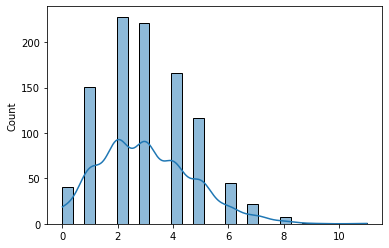

In [ ]:
## 2. Vẽ biểu đồ histogram và biểu đồ KDE.
sns.histplot(rvs, kde = True)
plt.show()

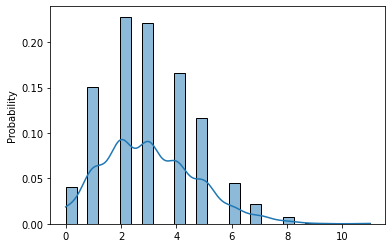

In [ ]:
## Vẽ biểu đồ phân phối
sns.histplot(rvs, kde = True, stat = 'probability')
plt.show()

In [ ]:
## 3. Tính các xác suất có: 0 cuộc gọi, 2 cuộc gọi, 5 cuộc gọi: P(X = x) = f(x)
print('Xác suất có 0 cuộc gọi đến tổng đài:', round(poisson.pmf(0, 3),2))
print('Xác suất có 2 cuộc gọi đến tổng đài:', round(poisson.pmf(2, 3),2))
print('Xác suất có 5 cuộc gọi đến tổng đài:', round(poisson.pmf(5, 3),2))

Xác suất có 0 cuộc gọi đến tổng đài: 0.05
Xác suất có 2 cuộc gọi đến tổng đài: 0.22
Xác suất có 5 cuộc gọi đến tổng đài: 0.1


In [ ]:
## 4. Tính các xác suất có tối đa: 2 cuộc gọi, 3 cuộc gọi, đa 5 cuộc gọi: P(X <= x) = F(x)
print('Xác suất có tối đa 2 cuộc gọi đến tổng đài:', round(poisson.cdf(2, 3),2))
print('Xác suất có tối đa 3 cuộc gọi đến tổng đài:', round(poisson.cdf(3, 3),2))
print('Xác suất có tối đa 5 cuộc gọi đến tổng đài:', round(poisson.cdf(5, 3),2))

Xác suất có tối đa 2 cuộc gọi đến tổng đài: 0.42
Xác suất có tối đa 3 cuộc gọi đến tổng đài: 0.65
Xác suất có tối đa 5 cuộc gọi đến tổng đài: 0.92
